In [1]:
#Objetivos
# patent number,
# date of patent, 
# patent title, 
# inventor name
# filed data.

In [30]:
import cv2
import re
import numpy as np
from glob import glob
from pytesseract import pytesseract
import matplotlib.pyplot as plt

In [3]:
arqs = sorted(glob(r'patents/*png'))

In [36]:
class arquive:
    def __init__(self, arq):
        self.arq = arq
        self.text = pytesseract.image_to_string(self.arq)
        self.size = len(str(self.text))
        img = cv2.imread(arq,0)
        self.shape = img.shape
        
    def get_patent(self):
        patent_number = re.compile(r'(?<=Patent N).*')
        check = patent_number.findall(self.text)
        num = re.compile(r'\d')
        check_num = num.findall(str(check))
        return int(''.join(check_num))

    def get_date(self):
        patent_date = re.compile(r'(?<=of Patent:).*')
        check = patent_date.findall(self.text)
        date = re.compile(r'\w')
        check_date = date.findall(str(check).replace(' ','_'))
        return (''.join(check_date)).replace('_',' ').strip().replace('Jan','1').replace('Feb','2').replace('Mar','3').replace('Apr','4').replace('May','5').replace('Jun','6').replace('Jul','7').replace('Aug','8').replace('Sep','9').replace('Oct','10').replace('Nov','11').replace("Dec",'12').replace(' ','-')

    def get_title(self):
        patent_title = re.compile(r'(?<=54).*')
        check = patent_title.findall(self.text)
        title = re.compile(r'[A-Z]')
        check_title = title.findall(str(check[0]))
        return check[0].replace(']','').replace(')','').strip()

    def get_inventor(self):
        patent_inventor = re.compile(r'(?<=Inventor:).*')
        check = patent_inventor.findall(self.text)
        str(check).split(',')
        name = check[0].split(',')
        return name[0].strip()

    def get_filed(self):
        filed_date = re.compile(r'(?<=Filed).*')
        check = filed_date.findall(self.text)
        date = re.compile(r'\w')
        check_date = date.findall(str(check).replace(' ','_'))
        return (''.join(check_date)).replace('_',' ').strip().replace('Jan','1').replace('Feb','2').replace('Mar','3').replace('Apr','4').replace('May','5').replace('Jun','6').replace('Jul','7').replace('Aug','8').replace('Sep','9').replace('Oct','10').replace('Nov','11').replace("Dec",'12').replace(' ','-')

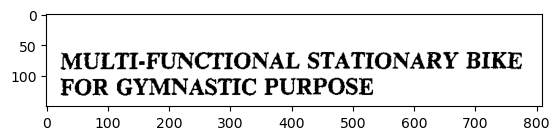

In [81]:
bgr_img = cv2.imread(arqs[0],0)
rgb_image = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2RGB)
title = rgb_image[300:450,340:1150]
plt.imshow(title)

In [37]:
for arq in arqs:
    arqx = arquive(arq)
    print(arqx.shape)

(3408, 2320)
(3408, 2320)
(3408, 2320)
(3408, 2320)
(3408, 2320)
(3408, 2320)
(3408, 2320)
(3408, 2320)
(3408, 2320)
(3408, 2320)
